In [2]:
import numpy as np
import matplotlib.pyplot as plt

Landy-Szalay:

\begin{equation}
\xi(r) = \frac{DD(r)-2DR(r)}{RR(r)} + 1
\end{equation}

In [39]:
#numero de puntos
N = 1200
# medidas del cubo
l = 1
D = 3



In [32]:
#distancia entre el punto j y cada uno de los puntos de b 
def distancias(d,r):
    dist = []
#calculamos la distancia de cada uno de los puntos de "d" a cada uno de los puntos de "r", un arreglo random
#el tamaño final de "Distancias" será de N*N pues son las combinaciones de puntos que hay
    for i in d:
        Distancias = np.linalg.norm(i-r,axis=1)
        dist.extend(Distancias)
    return np.array(dist)

#funcion de correlacion
def LS(d,r,NS):
    #NS es el numero de saltos que tendremos en r
    DD = distancias(d,d)
    RR = distancias(r,r)
    DR = distancias(d,r)
    
    rD = np.linspace(0,np.max(DD),NS)
    rR = np.linspace(0,np.max(RR),NS)
    rDR = np.linspace(0,np.max(DR),NS)
    
    e = []
    
    for i in range(NS-1):
    #contamos todas las distancias que estén en un intervalo r - r+dr  (r[i]-r[i+1])
        NDD = len(DD[(DD >= rD[i]) & (DD <= rD[i+1])])
        NRR = len(RR[(RR >= rR[i]) & (RR <= rR[i+1])])
        NDR = len(DR[(DR >= rDR[i]) & (DR <= rDR[i+1])])
        
     #aplicamos Landy y Szalay y lo guardamos como un valor de xi de un r particular (r[i+(1/2)])     
        e.append(NDD/(NRR)-2*NDR/(NRR)+1)

    return rD[:NS-1],np.array(e)

In [36]:
r1 = np.zeros((N,D))
r2 = np.zeros((N,D))

for i in range(N):
    r1[i] = np.random.uniform(0,l,D)
    r2[i] = np.random.uniform(0,l,D)    

In [37]:
r,e = LS(r1,r2,50)

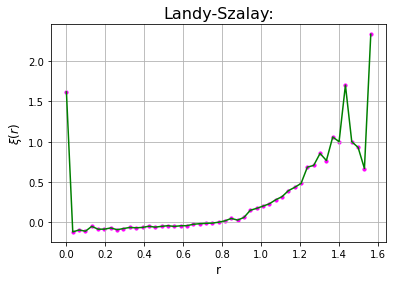

In [51]:
plt.scatter(r,e, s=10, c='magenta')
plt.plot(r,e,'green')
plt.xlabel('r',fontsize=12)
plt.ylabel('$\u03BE(r)$',fontsize=12)
plt.title('Landy-Szalay:',fontsize=16)
plt.grid();